<a href="https://colab.research.google.com/github/victorbeltrao12/Cousera_Inacabados/blob/master/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

>Os dados foram obtidos graças à colaboração de diversas pessoas numa comunidade chamada de *Our World in Data* (Nosso mundo em Dados) na luta contra o COVID-19, os dados foram compilados e disponibilizados  em diversos formatos para qualquer pessoa ter acesso e poder fazer seus insights,  foi utilizado um repositório no [Github]([https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data)) para passar e atualizar as informações.
Esse repositório e atualizado diariamente contendo informações como o número de infectados, número de mortes e atualizações sobre os estudos referentes a esta doença que vem assolando o mundo inteiro.
A maior dificuldade que temos de analisar uma doença nesta intensidade e a variação das informações, os dados vêm de diferentes fontes como governos federais, estaduais, municipais, jornais, não oficiais, entre outros, nos fazendo questionar a veracidade de tais dados, muitas vezes os dados são conflitantes.


### Dicionário de Variáveis
* Iso_code = código do país.
* Continent = localização geográfica do continente.
* Location = localização geográfica.
* Date = data de observação.
* Total_cases = total de casos confirmados de COVID-19.
* New_cases = novos casos confirmados de COVID-19.
* Total_deahts = novas mortes atribuídas ao COVID-19.
* Total_cases_per_million = total de caos confirmados pelo COVID-19 a cada 1.000.000 de pessoas.
* New_cases_per_million = novos casos confirmados pelo COVID-19 a cada 1.000.000 de pessoas.
* New_deaths_per_million = novas mortes atribuídas por COVID-19 a cada 1.000.000 de pessoas.
* Total_tests = total de testes da COVID-19.
* New_tests = Novos Testes para COVID-19.
* New_tests_smoothed = Novos testes de COVID-19 (7 dias suavizados). Para países que não relatam dados de testes diariamente, assumimos que os testes mudaram igualmente diariamente em quaisquer períodos em que não foram relatados dados. Isto produz uma série completa de números diários, que é então calculada como média em uma janela flutuante de 7 dias.
* Total_tests_per_thousand = Total de testes por COVID-19 a cada 1.000 pessoas.
New_tests_smoothed_per_thousand = Novos testes de COVID-19 (7 dias suavizados) a cada 1.000 pessoas.
* Tests_units = Unidades utilizadas pelo local para relatar seus dados de teste.
* Stringency_index = Índice de Estringência de Resposta do Governo: medida composta baseada em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibição de viagens, redimensionada para um valor de 0 a 100 (100 = resposta mais estrita).
* Population = População em 2020.
* Population_density = número de pessoas dividas por área de um quilometro quadrado, disponível no ano mais recente.
* Median_age = Idade média da população, projeção da ONU para 2020.
* Aged_65_older = participação da população que tem +65 anos de idade, disponível no ano mais recente.
* Aged_70_older = participação da população que tem +70 anos de idade em 2015.
* Gdp_per_capita = Produto interno bruto em paridade de poder de compra (dólar internacional constante em 2011), ano mais recente disponível.
* Extreme_poverty = Participação da população vivendo em extrema pobreza, ano mais recente disponível desde 2010.
* Cvd_death_rate = Taxa de mortalidade por doenças cardiovasculares em 2017.
Diabetes_prevalence = Prevalência do diabetes (% da população de 20 a 79 anos de idade) em 2017.
* Female_smokers = Participação de mulheres que fumam, ano mais recente disponível.
* Male_smokers = Participação de homens que fumam, ano mais recente disponível.
* Handwashing_facilities = Parte da população com instalações básicas de lavagem de mãos nas instalações, o ano mais recente disponível.
Hospital_beds_per_thousand = Leitos hospitalares por 1.000 pessoas, o ano mais recente disponível desde 2010.
* Life_expectansy = Expectativa de vida ao nascer em 2019.

### Importando os dados do COVID-19


In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Análise Exploratória dos Dados

>Nesta analise exploratória vamos ver as dimensões que contem em nossos *Dataset*, assim como suas colunas estão distribuídas, quais os tipos de variáveis que iremos analisar e manipular, faremos a manipulação dos dados que tiverem ausentes ou que sejam outliers para que não comprometa nossa analise como um todo.

<center><img alt="World Covid" width="50%" src="https://s2.glbimg.com/H_AVGXg-UU8YLha54QRZctxn2QQ=/0x0:1280x581/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2020/R/a/wEWfotSlq8dfmS4ZtVBg/6738337a-f742-4ef6-8845-742e8467d458.jpg"></center>

### Analise do Dataset
>comecaremos analisando o panorama em nivel para depois adetramos no brasil.

In [42]:
# Verificando as dimensoes dentro deste dataset
print('Dimensoes presentes no Dataset','\nVariaveis: ',df.shape[1], "\n"
'Entradas: ',df.shape[0])

#Vamos verificar as entradas do nosso Dataset
df.head()

Dimensoes presentes no Dataset 
Variaveis:  34 
Entradas:  31494


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [3]:
# Extrair os nomes das colunas para avaliar se todas estao corretas com nosso dicionario
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

>Um detalhe importante e que precisamos verificar e garantir que os dados dentro do dataset estao realmente com seus devidos tipos, vamos visualizar e garantir que esta tudo nos conformes.

In [4]:
#verificando os tipos das variaveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

>Uma boa pratica e sempre verifica a quantidade de dados ausentes, pois elas podem comprometer a analise.

In [5]:
#Verificando quais dados estao ausentes
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

new_tests                          0.70
new_tests_per_thousand             0.70
total_tests_per_thousand           0.69
total_tests                        0.69
new_tests_smoothed_per_thousand    0.67
new_tests_smoothed                 0.67
tests_units                        0.64
handwashing_facilities             0.59
extreme_poverty                    0.40
male_smokers                       0.29
female_smokers                     0.28
stringency_index                   0.20
hospital_beds_per_thousand         0.18
aged_65_older                      0.11
gdp_per_capita                     0.11
aged_70_older                      0.10
median_age                         0.10
cvd_death_rate                     0.10
diabetes_prevalence                0.07
population_density                 0.04
life_expectancy                    0.01
new_deaths_per_million             0.01
total_deaths_per_million           0.01
new_cases_per_million              0.01
total_cases_per_million            0.01


>Como pode se perceber a alguns dados faltantes em nosso *dataset*, e o que mais chama atencao e que a coluna *date* nao esta em seu formato padrao, que seria o formato *datetime*. Para que possamos explorar essa variavel ao maximo, vamos modifica-la para que fique certa.

In [6]:
# Transformando a coluna Date em formato Datetime
df.date = pd.to_datetime(df.date)

>Apos esta alteracao de formato, iremos verificar qual a data mais recente do nosso *dataset* com essa informacao vamos verificar o pais lider em casos de COVID-19 naquele momento.

In [7]:
#Verificando a data mais recente do Dataset
df.date.max()

Timestamp('2020-07-20 00:00:00')

In [9]:
#Total de casos de COVID-19
df.loc[df.date == '2020-07-20'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
31429,OWID_WRL,NaN,World,2020-07-20,14476729.0,207701.0,605979.0,3942.0,1857.229,26.646,77.741,0.506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
29961,USA,North America,United States,2020-07-20,3773260.0,61796.0,140534.0,415.0,11399.486,186.693,424.571,1.254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4244,BRA,South America,Brazil,2020-07-20,2098389.0,23529.0,79488.0,716.0,9872.012,110.694,373.957,3.368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
13361,IND,Asia,India,2020-07-20,1118043.0,40425.0,27497.0,681.0,810.174,29.293,19.925,0.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66
23765,RUS,Europe,Russia,2020-07-20,771546.0,0.0,12342.0,0.0,5286.935,0.000,84.572,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19493,MSR,North America,Montserrat,2020-07-20,12.0,0.0,1.0,0.0,2400.480,0.000,200.040,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.999000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.16
30462,VAT,Europe,Vatican,2020-07-20,12.0,0.0,0.0,0.0,14833.127,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.090000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12
3800,BES,North America,Bonaire Sint Eustatius and Saba,2020-07-20,10.0,0.0,0.0,0.0,381.374,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.622100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.79
4360,VGB,North America,British Virgin Islands,2020-07-20,8.0,0.0,1.0,0.0,264.577,0.000,33.072,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.023700e+04,207.973,NaN,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN,79.07


> Podemos ver que os paises que seguem lider na tabela de casos no dia 20 de julho de 2020 eram:
* Estados Unidos da America no dia 20-07-2020 tem 3.773.260 de casos.
* Brasil no 20-07-2020 tem 2.098.389 de casos.
* India no 20-07-2020 tem 1.118.043 de casos.	

>Agora, vamos verificar os casos de Morte.

In [10]:
#Verificando o total de mortes
df.loc[df.date == '2020-07-20'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
31429,OWID_WRL,NaN,World,2020-07-20,14476729.0,207701.0,605979.0,3942.0,1857.229,26.646,77.741,0.506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
29961,USA,North America,United States,2020-07-20,3773260.0,61796.0,140534.0,415.0,11399.486,186.693,424.571,1.254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4244,BRA,South America,Brazil,2020-07-20,2098389.0,23529.0,79488.0,716.0,9872.012,110.694,373.957,3.368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
29758,GBR,Europe,United Kingdom,2020-07-20,294792.0,726.0,45300.0,27.0,4342.456,10.694,667.295,0.398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
18796,MEX,North America,Mexico,2020-07-20,344224.0,5311.0,39184.0,296.0,2669.795,41.192,303.910,2.296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.900,21.400,87.847,1.380,75.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9913,FJI,Oceania,Fiji,2020-07-20,26.0,0.0,0.0,0.0,29.003,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.964440e+05,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.200,34.800,NaN,2.300,67.44
22293,PNG,Oceania,Papua New Guinea,2020-07-20,17.0,2.0,0.0,0.0,1.900,0.224,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.947027e+06,18.220,22.6,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN,64.50
28445,TLS,Asia,Timor,2020-07-20,24.0,0.0,0.0,0.0,18.203,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.318442e+06,87.176,18.0,3.556,1.897,6570.102,30.3,335.346,6.86,6.300,78.100,28.178,5.900,69.50
10443,PYF,Oceania,French Polynesia,2020-07-20,62.0,0.0,0.0,0.0,220.716,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.809040e+05,77.324,32.7,7.775,4.593,NaN,NaN,NaN,22.63,NaN,NaN,NaN,NaN,77.66


>Em comparacao as mortes, os paises lideres na tabela de COVID-19 no dia 20 de julho de 2020 eram:
* Estados Unidos da America com 140.534 mortes confirmadas.
* Brasil com 79.488 mortes confirmadas.
* Grã-Bretanha com 45.300 mortes confirmadas.

Para melhorar a visualizacao, vamos plotar um grafico de barras.

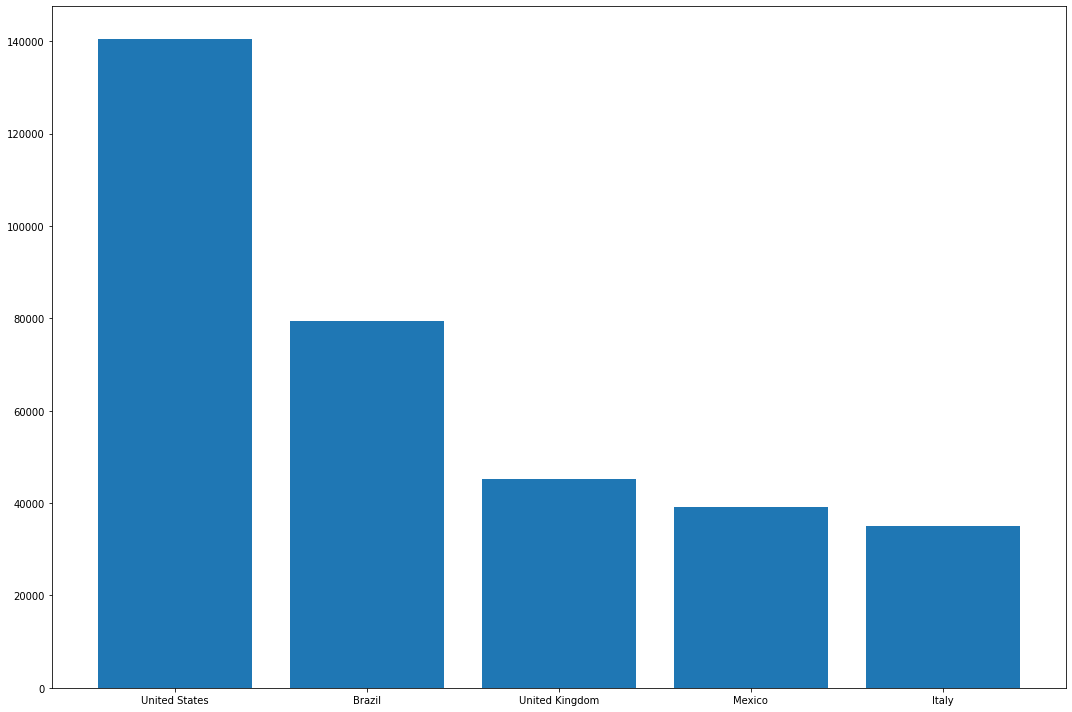

In [16]:
# gráfico de barras para total de mortes
top_5_total_deaths = df.loc[df.date == '2020-07-20', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()

### Como o virus esta se propragando?
>Uma preocupacao constantes de todas as organizacoes de saude e como esta a progressao do numero de casos e mortes no mundo.
Uma das formas mais eficazes de visualizar a evolucao ao longo de um determinado periodo de tempo, e o grafico de linhas. Vamos plotar um grafico de linha para demonstrar a evolucao de mortes no mundo inteiro.

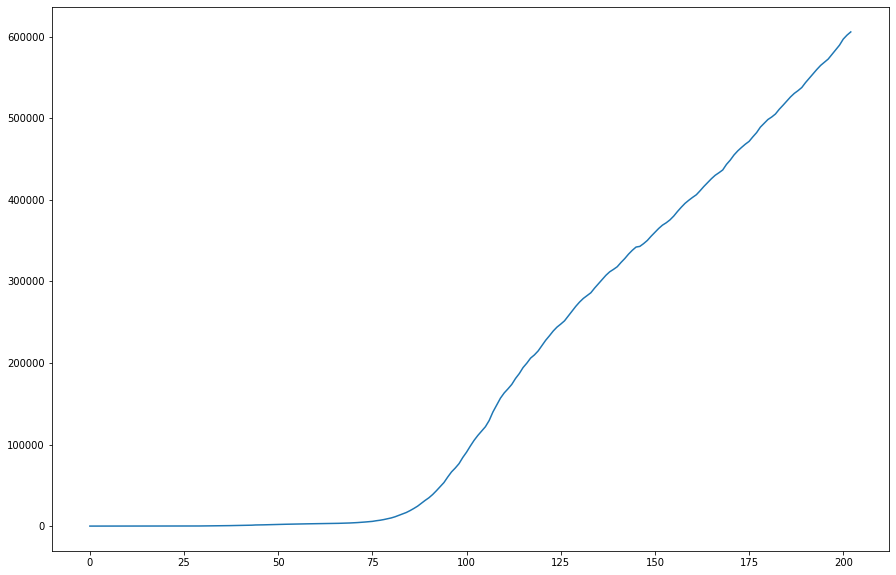

In [18]:
# Grafico de linha para visualizar as mortes ao redor do mundo
df.loc[df.location == "World","total_deaths"].reset_index(drop=True).plot(figsize=(15,10));

> Vamos ver como esta dividido o PIB dos paises que foram estao sofrendo pelo COVID-19.

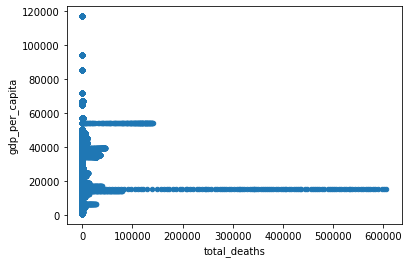

In [21]:
#Grafico de Dispersao para o PIB dos Paises
fig, ax = plt.subplots()

# plotar gdp_per_capita vs. total_deaths
df.plot.scatter(x='total_deaths', y='gdp_per_capita', ax=ax,)

plt.show()

> Como se pode perceber mesmo que de forma um pouco complexa que os paises que possuem um PIB abaixo foram os mais afetados pelo COVID-19.

### Análise Exploratória para o Brasil
>Agora que temos uma visao global dos acontecimentos com o COVID-19, vamos focar nos acontecimentos no Brasil.

<center><img alt="World Covid" width="50%" src="https://conteudo.imguol.com.br/c/noticias/42/2020/04/27/coronavirus-covid-19-pandemia-brasil-1587982962436_v2_450x337.jpg"></center>

In [33]:
#Criar uma copia do dataframe mas com enfase apenas no Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4042,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4043,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4044,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4045,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4046,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


>Pronto agora temos nosso dataframe com as informacoes somente do Brasil vamos refazer as analises que fizenos em nivel global e replica-las aqui.

In [23]:
#Vamos pegar a data mais atual do dataset novamente
df_brasil.date.max()

Timestamp('2020-07-20 00:00:00')

>Logo acima, verificamos que o nosso dataset inclui datas desde **31-12-2019** ate **20-07-2020**.

>Vamos verificar quando foram identificados os primeiros casos e quando foi noticiada a primeira morte no Brasil.

In [24]:
#Identificar quando foi registrada a primeira morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] !=0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4120,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


> A primeira morte foi datada no dia 18 de marco de 2020.

In [27]:
#Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso
#Identificar do primeiro caso

df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)
print('O primeiro caso registrado no Brasil foi em  {}'.format(df_brasil.date.loc[4120]))

O primeiro caso registrado no Brasil foi em  2020-03-18 00:00:00


>Uma informacao interessante para investigarmos e quanto tempo levou desde o primeiro caso atea a primeira morte.

In [34]:
#Identificar quantos dias demorou para Registramos a primeira morte, considerando o primeiro caso de COVID-19
#Primeiro caso ate a primeira morte

from datetime import date
delta = df_brasil.date.loc[4120] - df_brasil.date.loc[4107]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 13 dias entre o primeiro caso e a primeira morte no Brasil.


> Por fim mas nao menos importante, vamos plotar um grafico de linha para comparamos a evolucao dos casos e mortes no Brasil.

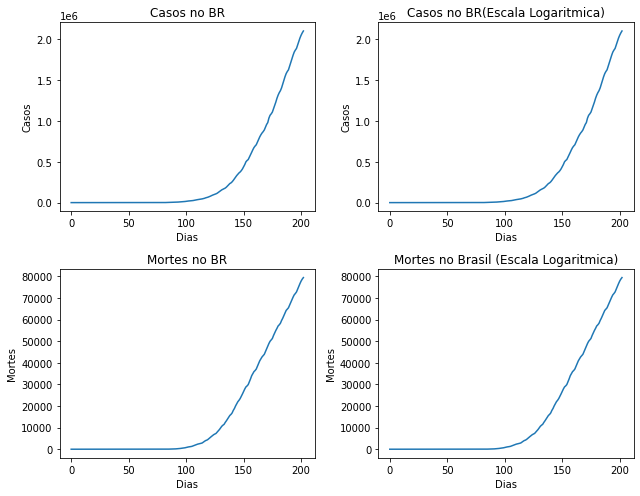

In [41]:
# plotar graficos de linha em escalas linear e logaritma para os casos totais e mortes totais.
x = list(range(203))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9,7))
ax1.set_title('Casos no BR')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x,z)

ax2.set_title('Casos no BR(Escala Logaritmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.plot(x,z)

ax3.set_title('Mortes no BR')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x,z2)

ax4.set_title('Mortes no Brasil (Escala Logaritmica)')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax.set_yscale('Log')
ax4.plot(x,z2)
plt.tight_layout()


## Conclusão

Vale ressaltar que a base de dados utilizada para esta analise e atualizada diariamente entao minha analise sera desatualizada "rapidamente".

Entrentando ate o momento que esta analise foi feita podemos destacar que os Estados Unidos ja alcancou a marca de 3 milhoes de infectados pelo COVID-19.

O crescimento dos infectados no Brasil deu um pulo gigantesco o fazendo ser o segundo na lista de mais contaminados.

No mundo inteiro, casos e mortes ainda estao em grande evolucao.

Brasil no dia 19 de julho de 2020 alcancou a marca de:
* Total de mortes: 79.533
* Mortes em 24 horas: 716
* Média de novas mortes nos últimos 7 dias: 1.055 por dia (variação em 14 dias: +3%)
* Total de casos confirmados: 2.099.896
* Casos confirmados em 24 horas: 24.650
* Média de novos casos nos últimos 7 dias: 33.389 por dia (variação em 14 dias: %-9)

>fica so um adendo para que sigam as recomendacoes da OMS como por exemplo:
* 1 - MÃOS Lavar frequentemente
* 2 COTOVELO Usar para cobrir a tosse
* 3 ROSTO Não tocar
* 4 ESPAÇO Manter a distância segura
* 5 CASA Não sair, se possível
* 6 MASCARA o uso da mascara e indispensavel, use sempre!
* 7 EVITE AGLOMERACAO evite todo e qualquer tipo de aglomeracao.